# Gym ML- churn predicting and clustering
- we will check the given data and preprocesing ad needed.
- we will aply 4 models to predict churn and pick the best one.
- we will chek what features is most relevant to churn predicting.
- we will divide the users to clusters.
- learn the features of each cluster.
- make general strategic principles (based on the analisys).
- make custom strategy by cluster.


## Initialization

In [1]:
#! pip install plotly

In [2]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import statistics as stat 
from plotly import graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#import math as math
#import scipy.stats as stats
#from random import sample
#import datetime 

import warnings
warnings.filterwarnings('ignore')

# Load data

## sample the data
- we will make a path variable.
- we will sample 500 rows of data to decide the best way to optimize.


In [3]:
#a path variable
path='/Users/boris/Desktop/praktikum/p 3.2/'

In [4]:
#sample 500 rows of data
try:
    sdata= pd.read_csv(path+'gym_churn_us.csv', nrows=500)
    
except:
    sdata = pd.read_csv('/datasets/gym_churn_us.csv', nrows=500)

In [5]:
sdata.info(memory_usage='deep')
sdata.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             500 non-null    int64  
 1   Near_Location                      500 non-null    int64  
 2   Partner                            500 non-null    int64  
 3   Promo_friends                      500 non-null    int64  
 4   Phone                              500 non-null    int64  
 5   Contract_period                    500 non-null    int64  
 6   Group_visits                       500 non-null    int64  
 7   Age                                500 non-null    int64  
 8   Avg_additional_charges_total       500 non-null    float64
 9   Month_to_end_contract              500 non-null    float64
 10  Lifetime                           500 non-null    int64  
 11  Avg_class_frequency_total          500 non-null    float64

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   
5             1   34                    450.743960                    1.0   
6             1   32                     94.266389                    6.0   
7             0   30                    217.786641                    1.0   
8             1   23                     45.409909                    1.0   
9             0   31                     65.310836                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   
5         3                   2.623477                           2.637007   
6         2                   1.138941                           1.277242   
7         0                   1.213502                           1.049387   
8         1                   1.106239                           1.059333   
9        11                   1.810852                           1.951368   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      1  
8      0  
9      0

## Sampling data summary
- The types are fine- all numeric. Were ready to load the data.

In [6]:
#loading the data
try:
    data= pd.read_csv(path+'gym_churn_us.csv')
    
except:
    data = pd.read_csv('/datasets/gym_churn_us.csv')

In [7]:
print(data.shape)
data.info()

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-n

**From the info It seems the data is ready. We will make sure there is no missing values or duplicates.** 

In [8]:
#Check for nulls
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [9]:
data.duplicated().sum()

0

**Current dataset fields:**
<br>
- 'gender'
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- 'Phone' — whether the user provided their phone number
- 'Age'
- 'Lifetime' — the time (in months) since the customer first came to the gym
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' — the months remaining until the contract expires
- 'Group_visits' — whether the user takes part in group sessions
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.
- 'Churn' — the fact of churn for the month in question

The data is ready for work!

# exploratory data analysis (EDA)
- total churn pie.
- distribution of features (churn/nonchurn)
- correlation heatmap of features.
- scatter matrix of features.



In [10]:
print('-----Churn-----')
print('mean: {}'.format(data['Churn'].mean()))

x=data['Churn'].value_counts().reset_index()
x
fig = go.Figure(data=[go.Pie(labels=['non Chrun', 'Chrun'], values=x['Churn'])])
fig.show()

-----Churn-----
mean: 0.26525


-----Avg_additional_charges_total-----
total mean: 146.94| standard deviation: 96.36
churn users mean: 115.08| non chrun users mean: 158.45


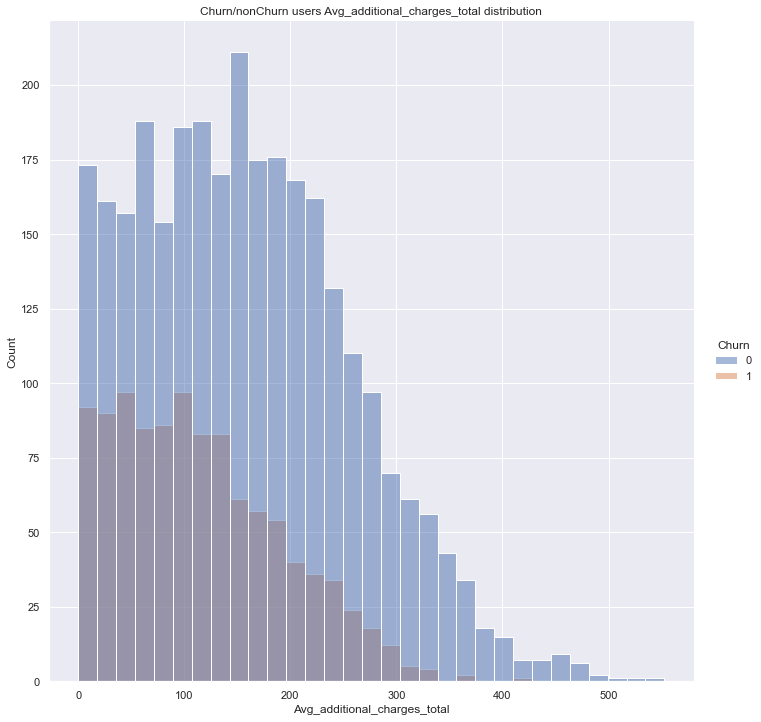

-----Avg_class_frequency_total-----
total mean: 1.88| standard deviation: 0.97
churn users mean: 1.47| non chrun users mean: 2.02


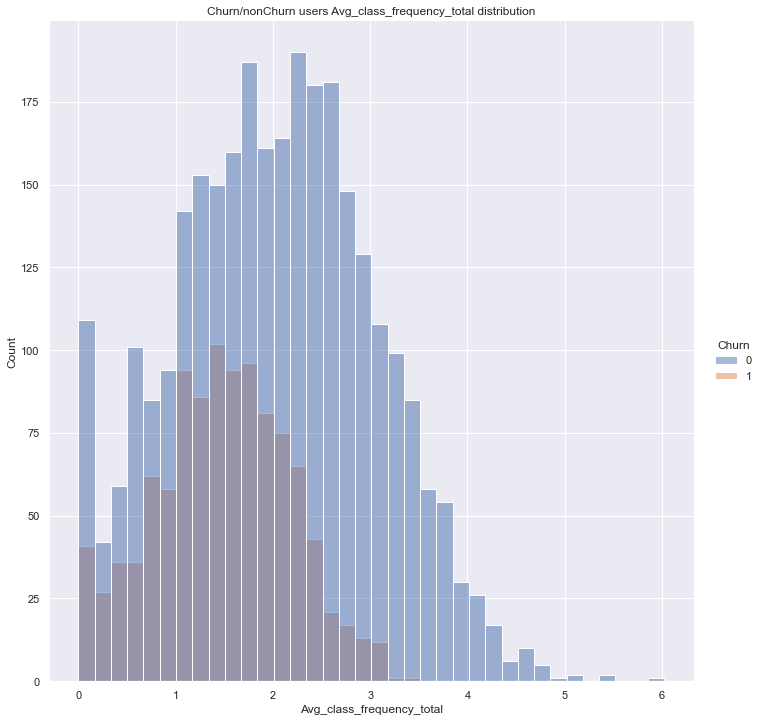

-----Avg_class_frequency_current_month-----
total mean: 1.77| standard deviation: 1.05
churn users mean: 1.04| non chrun users mean: 2.03


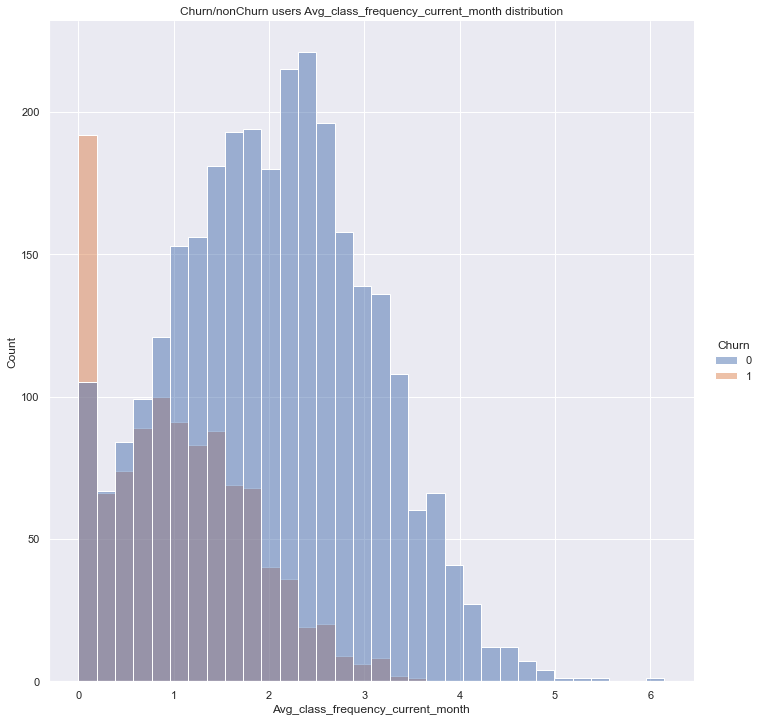

In [11]:
par_l=['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
for p in par_l:
    print('-----{}-----'.format(p))
    print('total mean: {:.2f}| standard deviation: {:.2f}'.format(data[p].mean(), stat.stdev(data[p])))
    print('churn users mean: {:.2f}| non chrun users mean: {:.2f}'.
          format((data.query('Churn==1')[p]).mean(), (data.query('Churn==0')[p]).mean()))
    sns.set(rc = {'figure.figsize':(15,10)})
    ax=sns.displot(data=data, x=p, hue='Churn', height=10, aspect=1).set(title='Churn/nonChurn users {} distribution'.format(p))
    plt.show()

-----gender-----
total mean: 0.51| standard deviation: 0.50
churn users mean: 0.51| non chrun users mean: 0.51


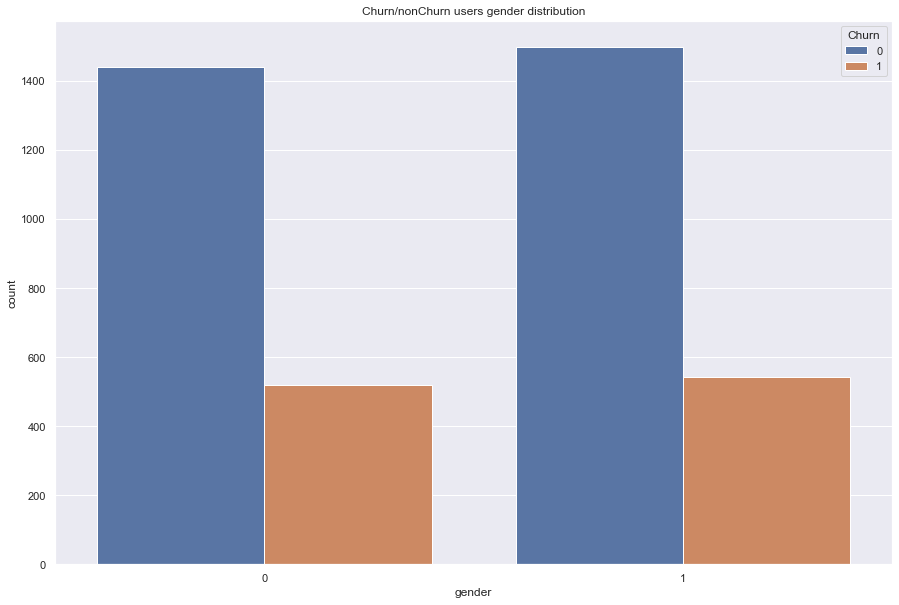

-----Near_Location-----
total mean: 0.85| standard deviation: 0.36
churn users mean: 0.77| non chrun users mean: 0.87


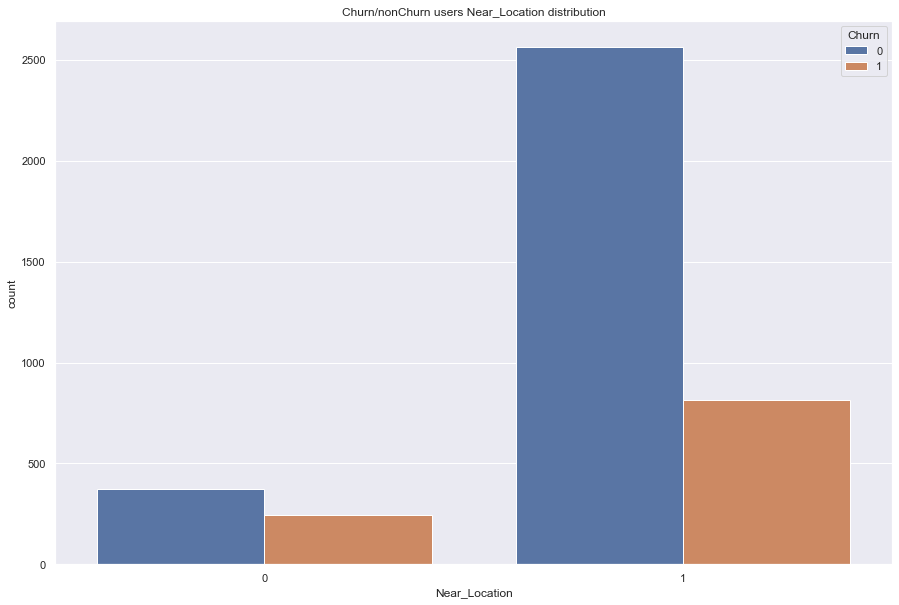

-----Partner-----
total mean: 0.49| standard deviation: 0.50
churn users mean: 0.36| non chrun users mean: 0.53


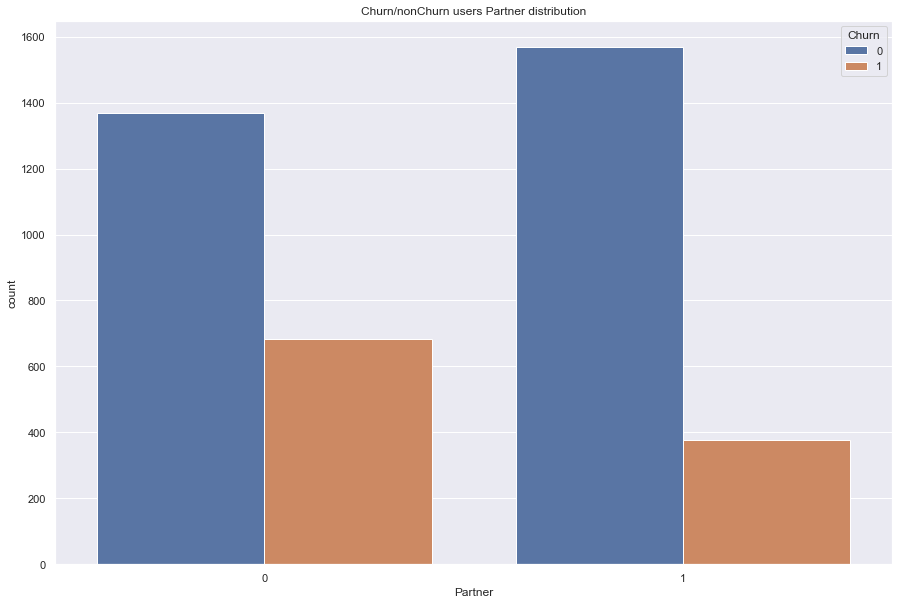

-----Promo_friends-----
total mean: 0.31| standard deviation: 0.46
churn users mean: 0.18| non chrun users mean: 0.35


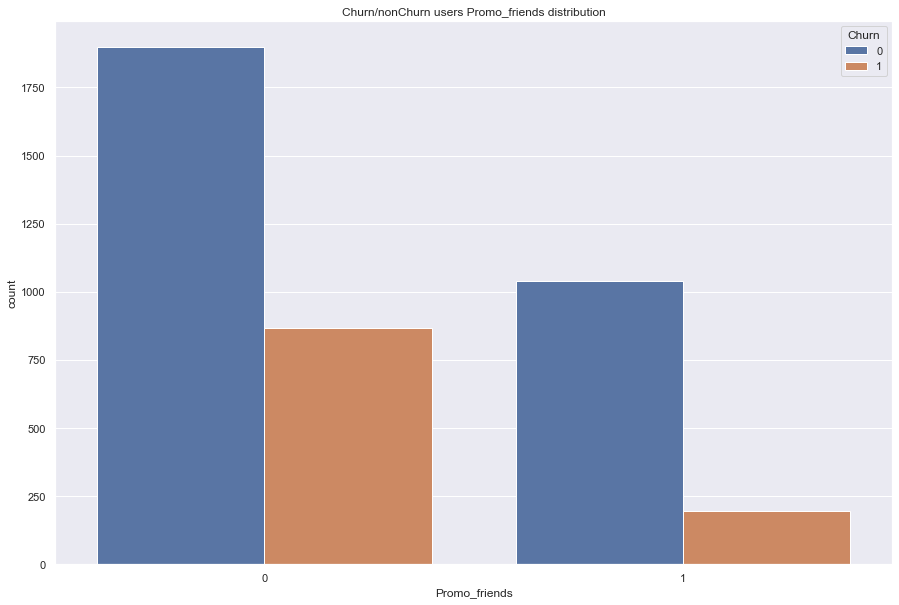

-----Phone-----
total mean: 0.90| standard deviation: 0.30
churn users mean: 0.90| non chrun users mean: 0.90


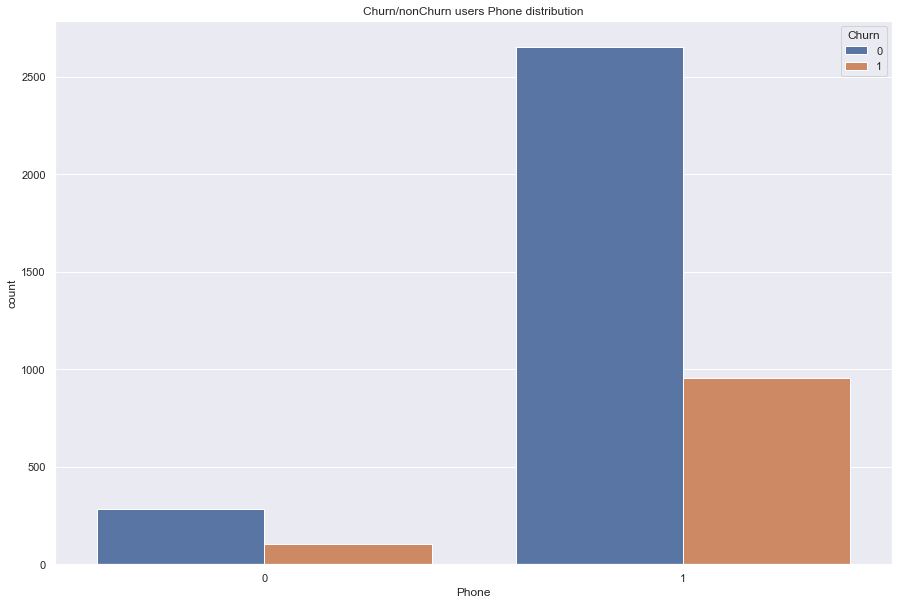

-----Contract_period-----
total mean: 4.68| standard deviation: 4.55
churn users mean: 1.73| non chrun users mean: 5.75


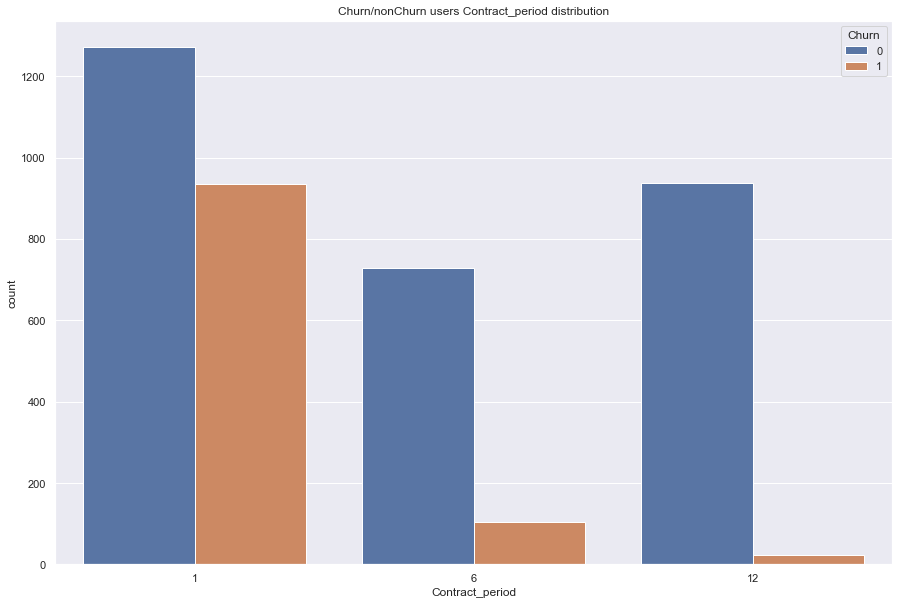

-----Group_visits-----
total mean: 0.41| standard deviation: 0.49
churn users mean: 0.27| non chrun users mean: 0.46


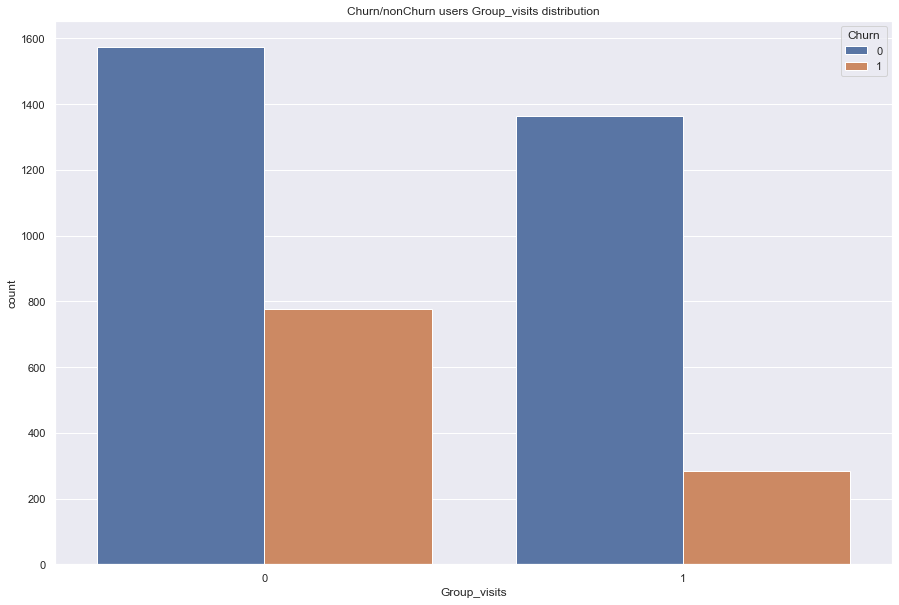

-----Age-----
total mean: 29.18| standard deviation: 3.26
churn users mean: 26.99| non chrun users mean: 29.98


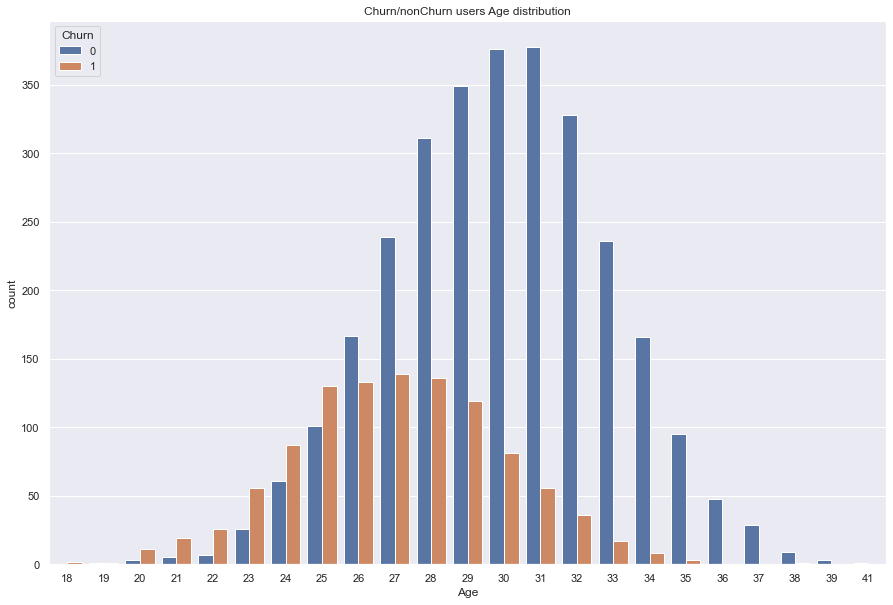

-----Month_to_end_contract-----
total mean: 4.32| standard deviation: 4.19
churn users mean: 1.66| non chrun users mean: 5.28


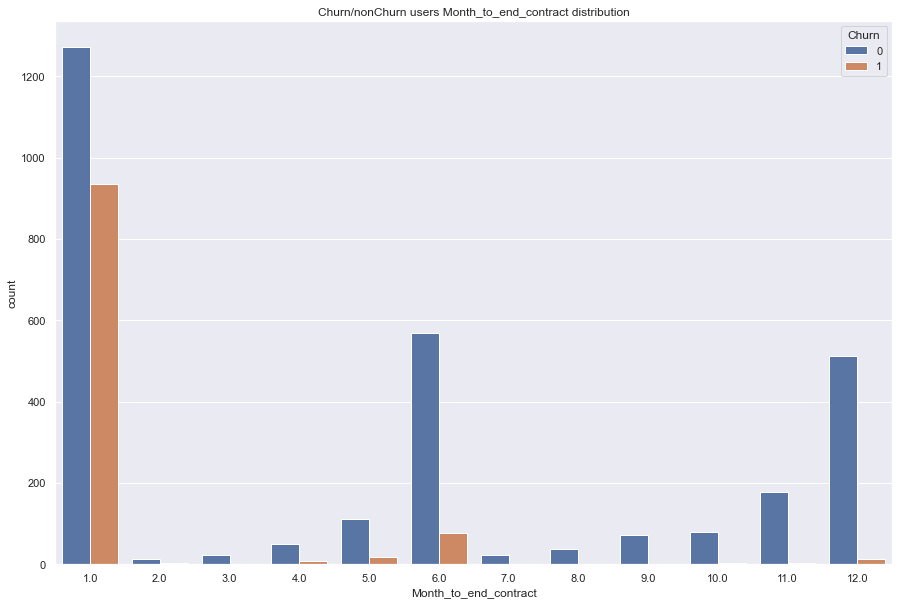

-----Lifetime-----
total mean: 3.72| standard deviation: 3.75
churn users mean: 0.99| non chrun users mean: 4.71


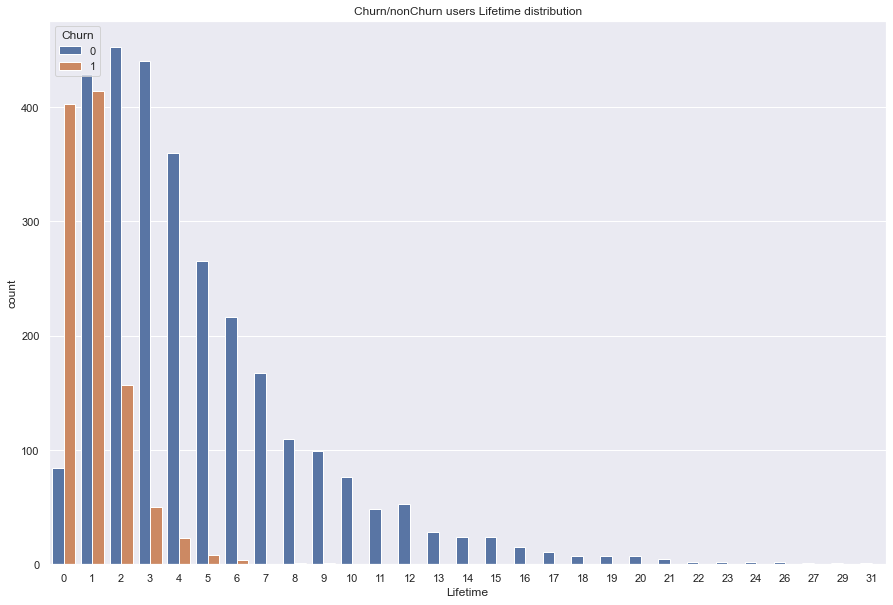

In [12]:
par_l=data.drop(columns=['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']).columns
for p in par_l:
    print('-----{}-----'.format(p))
    print('total mean: {:.2f}| standard deviation: {:.2f}'.format(data[p].mean(), stat.stdev(data[p])))
    print('churn users mean: {:.2f}| non chrun users mean: {:.2f}'.
          format((data.query('Churn==1')[p]).mean(), (data.query('Churn==0')[p]).mean()))
    sns.set(rc = {'figure.figsize':(15,10)})
    ax=sns.countplot(data=data, x=p, hue='Churn').set(title='Churn/nonChurn users {} distribution'.format(p))
    plt.show()

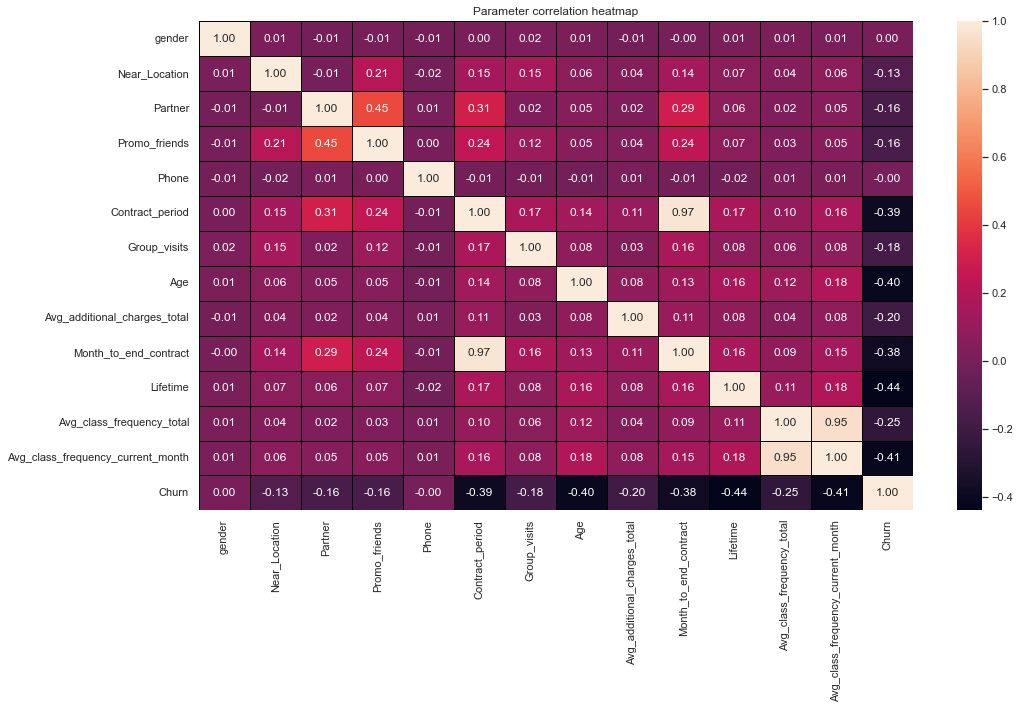

In [13]:
x=data.corr()

sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Parameter correlation heatmap')
sns.heatmap(x, annot=True, fmt='.2f', linewidths=1, linecolor='black')
plt.show()

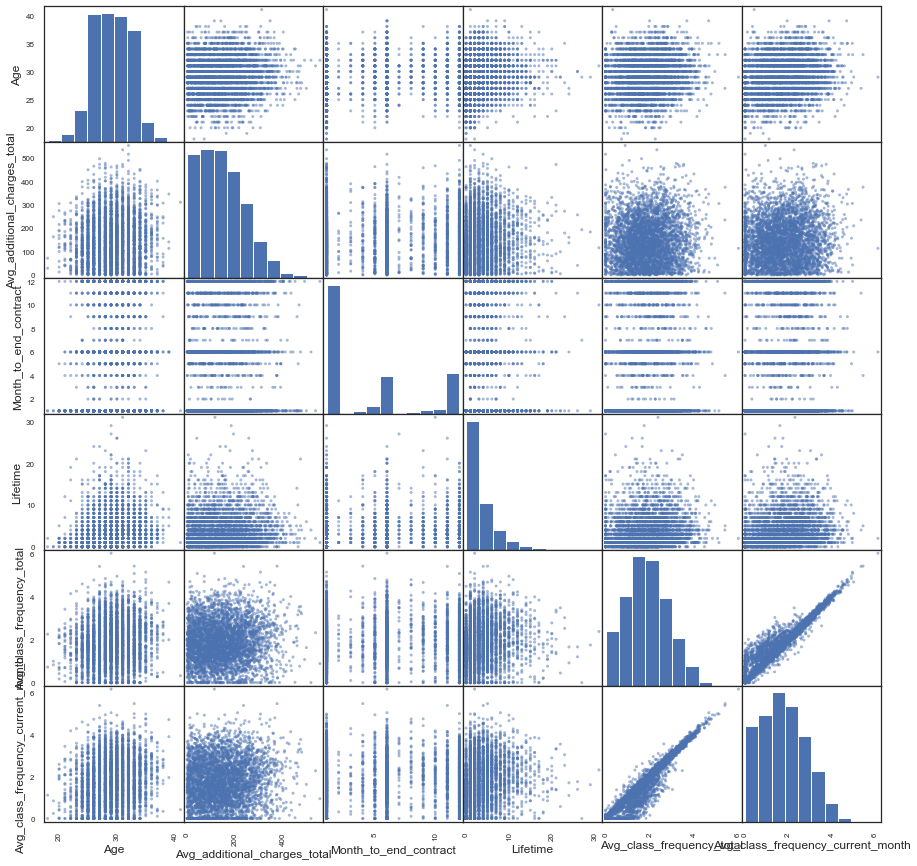

In [14]:
par_l=['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
pd.plotting.scatter_matrix(data[par_l], figsize=(15, 15))
plt.show()

## exploratory data analysis (EDA)- conclusion
correlation to churn:<br>

**non corr:**
- 'gender' and 'phone'- its reasonable to assume that users who gave their phones is more committed, clearly its not the case.<br>

**low (negative) corr:**
- 'Near_Location'- living far is a good 'excuse' for dropping from the gym.
- 'Partner', 'Promo_friends', 'Group_visits'- those parameters linked to a community feeling. Makes the users feel a part (and not to leave.).
- 'Avg_additional_charges_total'- money investment is always a commitment boost.
- 'Avg_class_frequency_total'- if you're using the gym- its less likely that you'll quit. <br>

**high (negative) corr:**
- 'Contract_period'- buying a longer contract shows commitment to the future.
- 'Age'- older people is mor stable.
- 'Month_to_end_contract'- people tends to leave at the end of theire contract. Leaving at the end is a passive act of not renewing.
- 'Lifetime'- being part of the gym is a part of life. You renew on auto.
- 'Avg_class_frequency_current_month'- if your planning on leaving. Stop coming to class is predicted. 
<br>
<br>
parameters with strong corr (multicollinearity):
- 'Month_to_end_contract'||'Contract_period'- corr of 0.97. the longer the contract= more months till its ending.
- 'Avg_class_frequency_total'||'Avg_class_frequency_current_month'- corr of 0.95. if the user is not planning to leave, and the gym is part of his life, the parameters should be almost identical.



# model to predict user churn
- We will test 4 models to see who is the best: logistic regression, decision tree, random forest and gradient-boosted tree.<br>
- We will check the following matrixes: Accuracy, Precision, Recall and F1.
- we will check What features got the highest importance at the wining model. 


In [15]:
# divide the data into features (the X matrix) and a target variable (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

# create a StandardScaler object and apply it to the train and test sets
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)


In [16]:
def print_matrix(y_true, y_pred):
    print('Accuracy: {:.2f}|Precision: {:.2f}|Recall: {:.2f}|F1: {:.2f}'.format(accuracy_score(y_true, y_pred),
                                                                precision_score(y_true, y_pred),
                                                                recall_score(y_true, y_pred),
                                                                f1_score(y_true, y_pred)))

In [17]:
models= [LogisticRegression(random_state= 0), DecisionTreeClassifier(random_state= 0),
         RandomForestClassifier(random_state= 0), GradientBoostingClassifier(random_state= 0)]

for m in models:
    print('-----{}-----'.format(m))
    model=m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_matrix(y_test, y_pred)
    
   
    

-----LogisticRegression(random_state=0)-----
Accuracy: 0.91|Precision: 0.81|Recall: 0.80|F1: 0.81
-----DecisionTreeClassifier(random_state=0)-----
Accuracy: 0.90|Precision: 0.79|Recall: 0.80|F1: 0.80
-----RandomForestClassifier(random_state=0)-----
Accuracy: 0.92|Precision: 0.84|Recall: 0.82|F1: 0.83
-----GradientBoostingClassifier(random_state=0)-----
Accuracy: 0.93|Precision: 0.88|Recall: 0.84|F1: 0.86


## Model's matrixes- conclusion
- the decision tree gave the worst results on all matrixes.
- Gradient Boosting gave the best on all matrixes.

Gradient Boosting matrixes meaning:
- Accuracy: 0.93- 93% of all predictions were right. (If we will bet on non-churn on all users, we will get 73.5%).
- Precision: 0.88- 88% of positive predictions are true. 
- Recall: 0.84- 84% of churn users were predicted correctly by the model.
- F1: 0.86- harmonizing metric that takes into account the balance between Accuracy and Precision.

At our case, the Gradient Boosting gave the best results on all matrixes. It's not always the case. We need to figure what is more 'expensive' to us- FP or FN. From my knowledge of the gym business. Most of the money comes from paying users who doesn't come at all (almost at all). <br>
Predict a FP can make us approach to an future paying costumer- 'awakening the bear', and make him to leave.
From the other hand a FN can make us neglect a user that with one promotion or a phone call would have stayed. <br>
Our case is a great example for the need of balance between Precision and Recall.


## Gradient Boosting- highest importance features

In [18]:

gb_model= GradientBoostingClassifier(random_state= 0)
gb_model.fit(X_train, y_train)
gb_model.predict(X_test)

importances = gb_model.feature_importances_
df = pd.DataFrame(importances)

print(df.sort_values(by = 0, ascending=False))

           0
10  0.475572
12  0.166446
11  0.107377
7   0.091456
9   0.064511
5   0.059968
8   0.026895
6   0.005378
3   0.001964
1   0.000316
4   0.000117
0   0.000000
2   0.000000


**importance features- conclusion**
- highest: Lifetime- x3 higher than the next on the list.
- medium: frequency_current_month, frequency_total and age.
- low- Month_to_end_contract, Contract_period and additional_charges.
- the other features are not relevant (under 0.01).

Lifetime had the highest corr score. Surprisingly- age, Contract_periodand Month_to_end_contract got much lower importance then I would of predict based on the corr scores (its good thing that the machine makes the predictions and not me!)


# Create user clusters
- using linkage and dendrogram to decide to how many should we divide the users.
- divide the users to clusters with k-means algorithm (to 5 clusters as requested).
- learning the features and churn rates of the clusters.

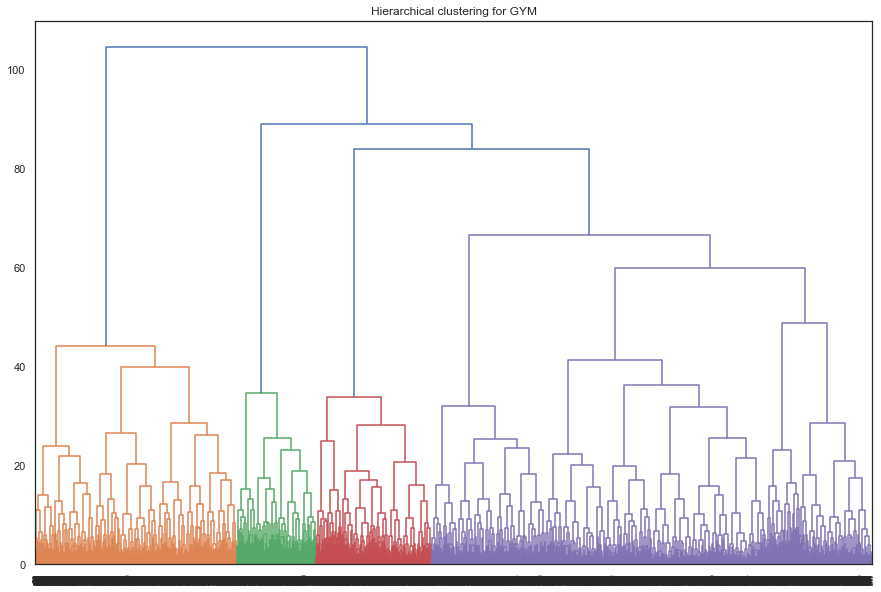

In [19]:

x=data.drop(columns='Churn')
sc = StandardScaler()
X_sc = sc.fit_transform(x)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

**Linkage and dendrogram- conclusion**
- we have 4 colors- suggesting 4 clusters.
- the clusters are verry different on size.
- I will divide to 5 clusters as instructed. 


In [20]:

km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)

labels

array([3, 1, 2, ..., 1, 1, 3])

In [21]:
data['cluster']= labels
data.groupby('cluster').mean()

gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.495050       0.000000  0.463366       0.079208  1.000000   
1        0.502970       0.959406  0.783168       0.574257  1.000000   
2        0.485737       1.000000  0.350238       0.240095  1.000000   
3        0.522078       0.862338  0.470130       0.306494  0.000000   
4        0.559666       0.976134  0.356802       0.230310  0.998807   

         Contract_period  Group_visits        Age  \
cluster                                             
0               2.352475      0.215842  28.477228   
1              10.889109      0.542574  29.982178   
2               1.948494      0.341521  28.167987   
3               4.787013      0.425974  29.301299   
4               2.669451      0.473747  30.125298   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                                  
0                          135.457501               2.198020  2.809901   
1                          160.761016               9.954455  4.736634   
2                          131.622204               1.856577  2.440571   
3                          143.957664               4.475325  3.924675   
4                          161.657905               2.459427  4.898568   

         Avg_class_frequency_total  Avg_class_frequency_current_month  \
cluster                                                                 
0                         1.660461                           1.477324   
1                         1.982055                           1.974789   
2                         1.247634                           1.012983   
3                         1.847220                           1.716369   
4                         2.852002                           2.850161   

            Churn  
cluster            
0        0.443564  
1        0.027723  
2        0.514263  
3        0.267532  
4        0.068019

**Prone to leave/ loyal- by clusters**
<br>
(The total churn rate is 26.5%)
- Loyal- clusters 1 and 3 (2% and 8% churn rates). 
- medium- clusters 0 and 5 (26% churn rate).
- churn risk- cluster 2 (56% churn rate!).

Cluster 2 has the shortest lifetime mean as the smallest mean at other features. <br>
Let's get to know our clusters features.


**clusters sizes**
- Loyal- 43% (1 and 3)
- medium- 25% (4 and 0)
- churn risk- 31% (2)

In [22]:
x=data['cluster'].value_counts().reset_index()
fig = go.Figure(data=[go.Pie(labels=x['index'], values=x['cluster'])])
fig.show()

-----Avg_additional_charges_total-----


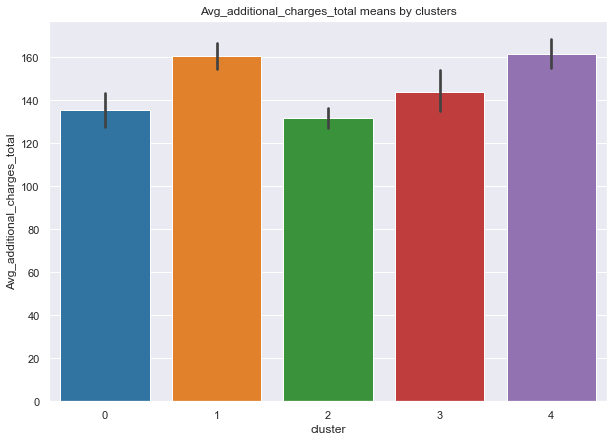

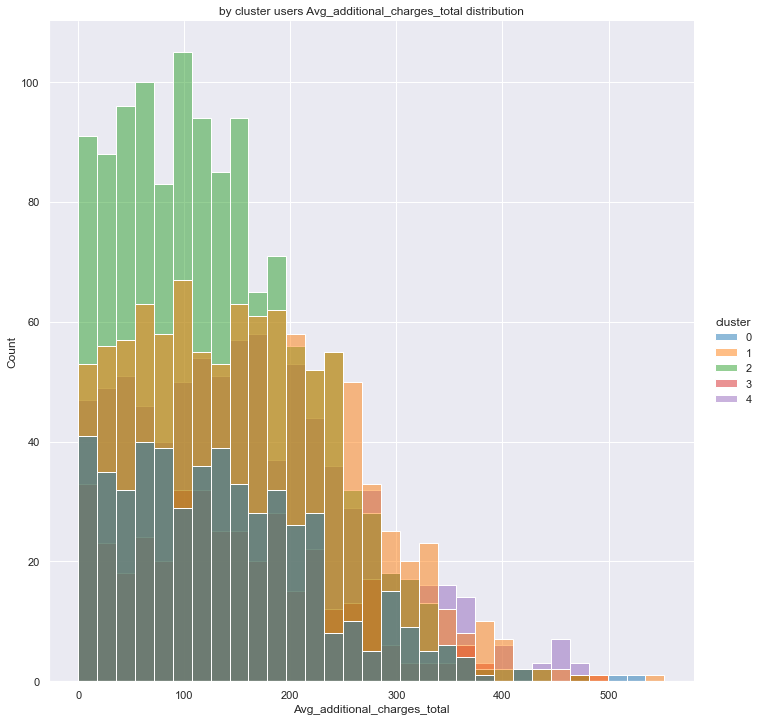

-----Avg_class_frequency_total-----


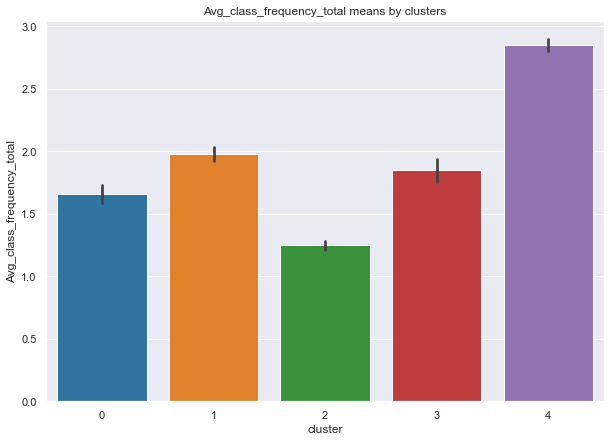

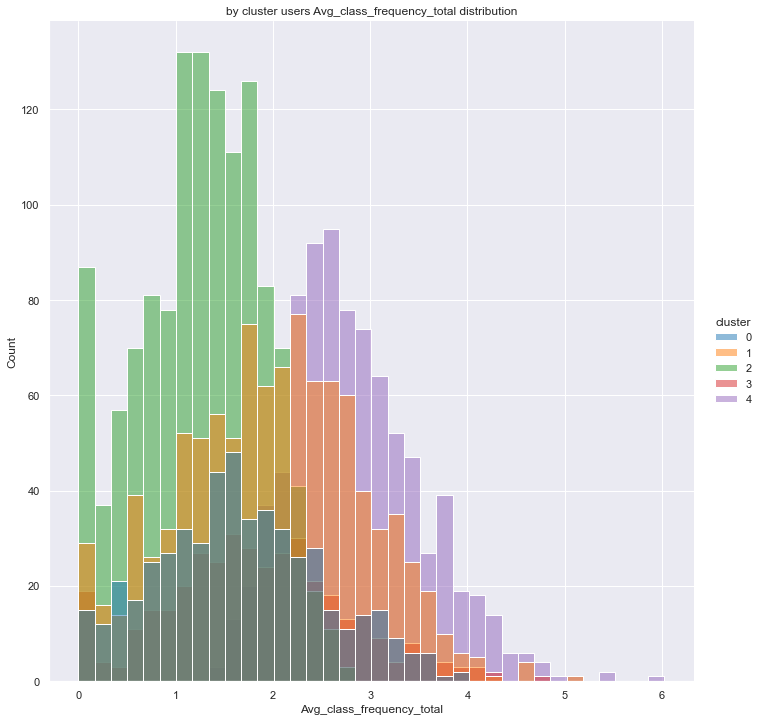

-----Avg_class_frequency_current_month-----


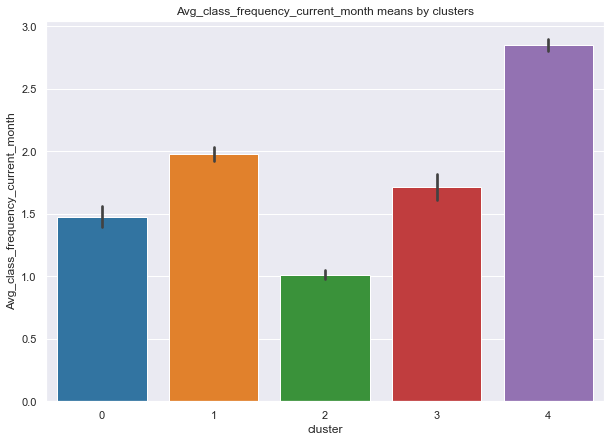

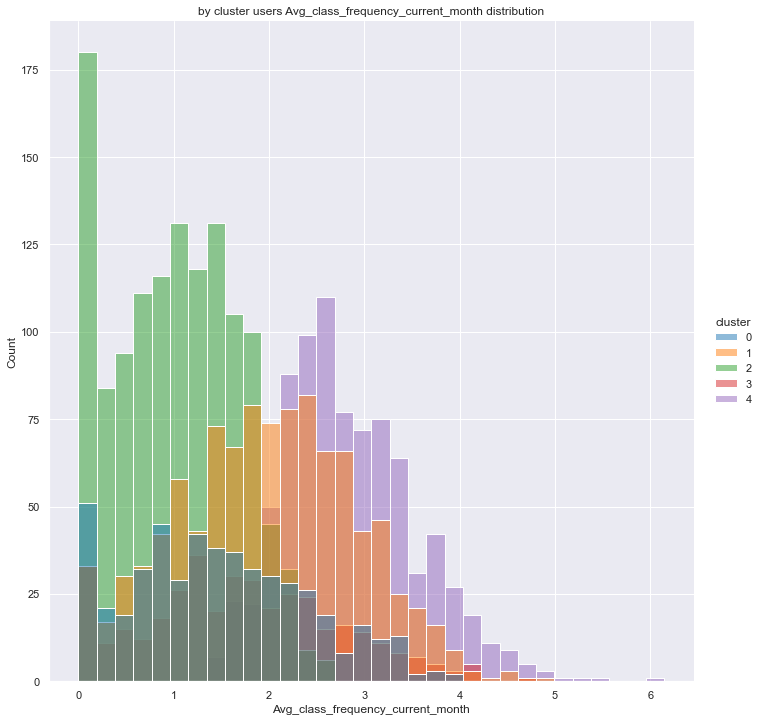

In [23]:
par_l=['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
for p in par_l:
    print('-----{}-----'.format(p))
    
    sns.set(rc = {'figure.figsize':(10,7)})
    sns.barplot(data=data, x='cluster', y=p, palette="tab10").set(title='{} means by clusters'.format(p))
    plt.show()
    
    sns.set(rc = {'figure.figsize':(15,10)})
    ax=sns.displot(data=data, x=p, hue='cluster', height=10, aspect=1, palette="tab10").set(title='by cluster users {} distribution'.format(p))
    plt.show()

-----gender-----


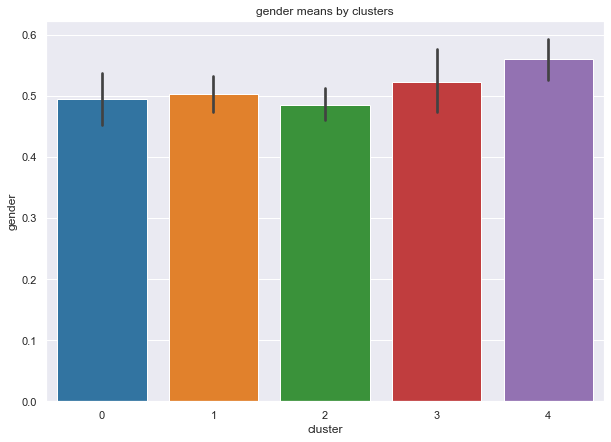

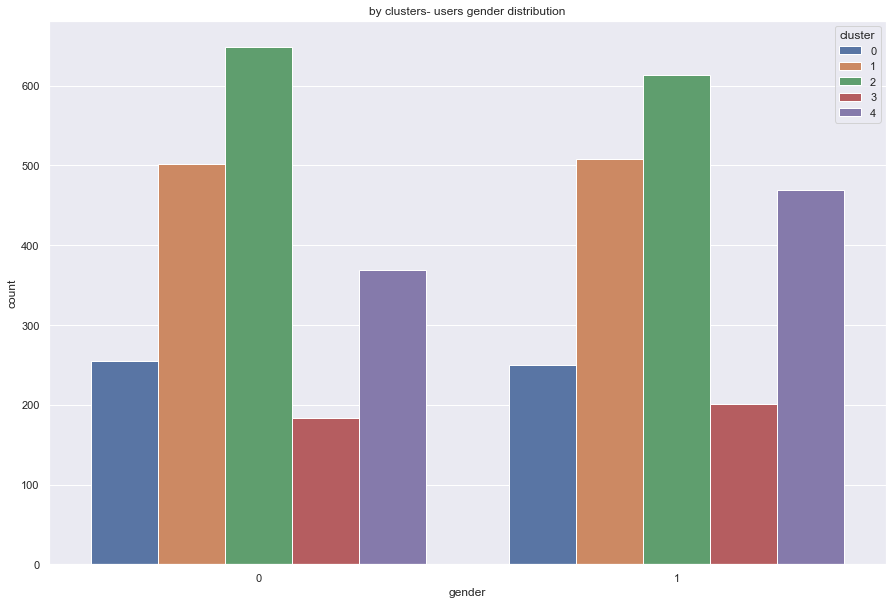

-----Near_Location-----


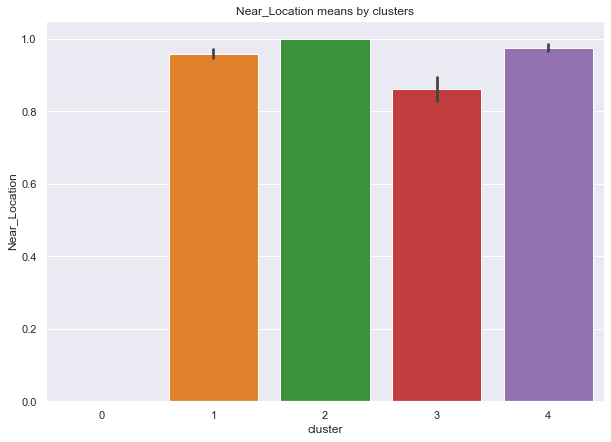

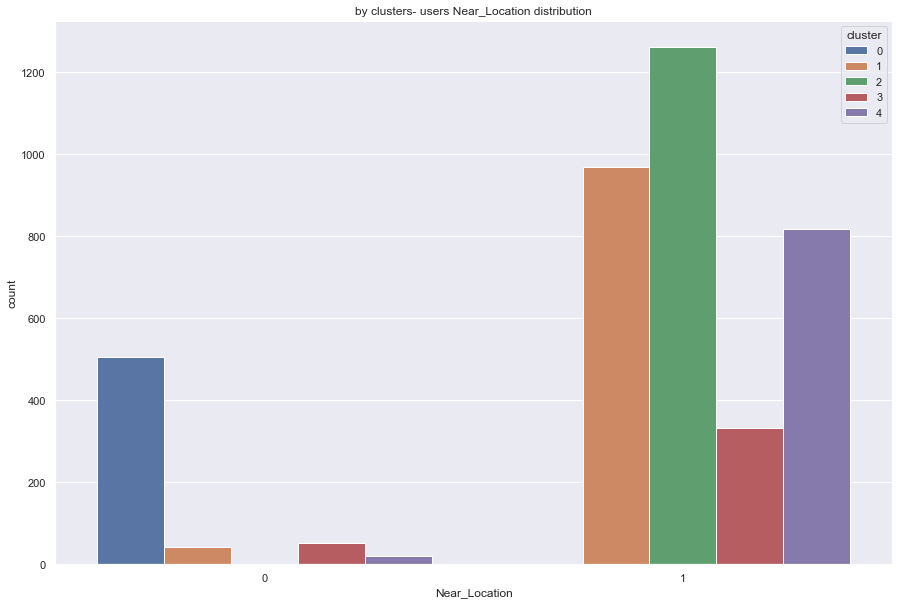

-----Partner-----


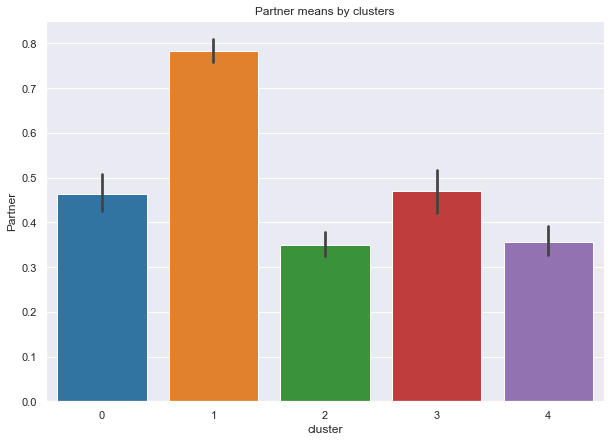

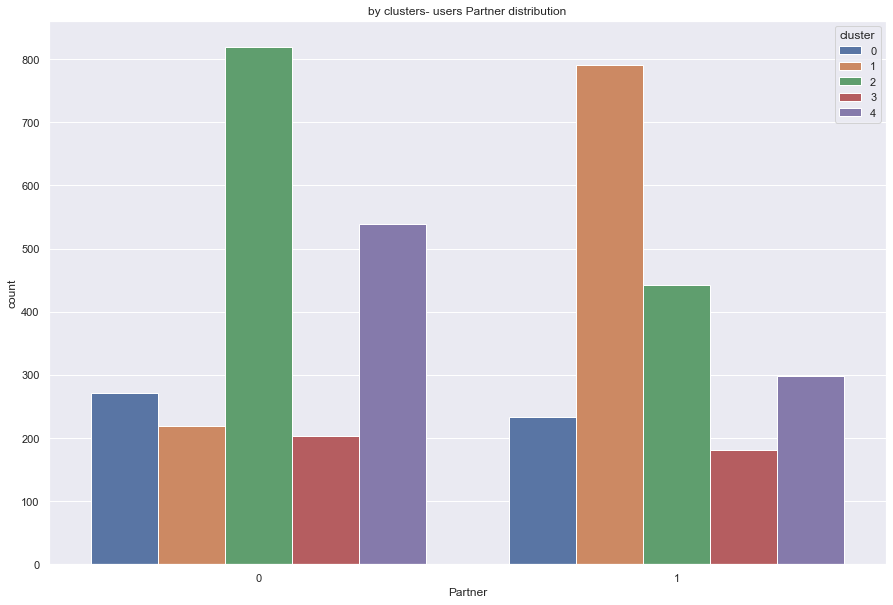

-----Promo_friends-----


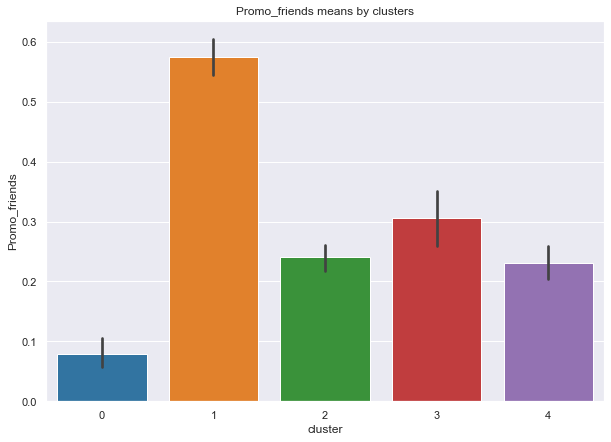

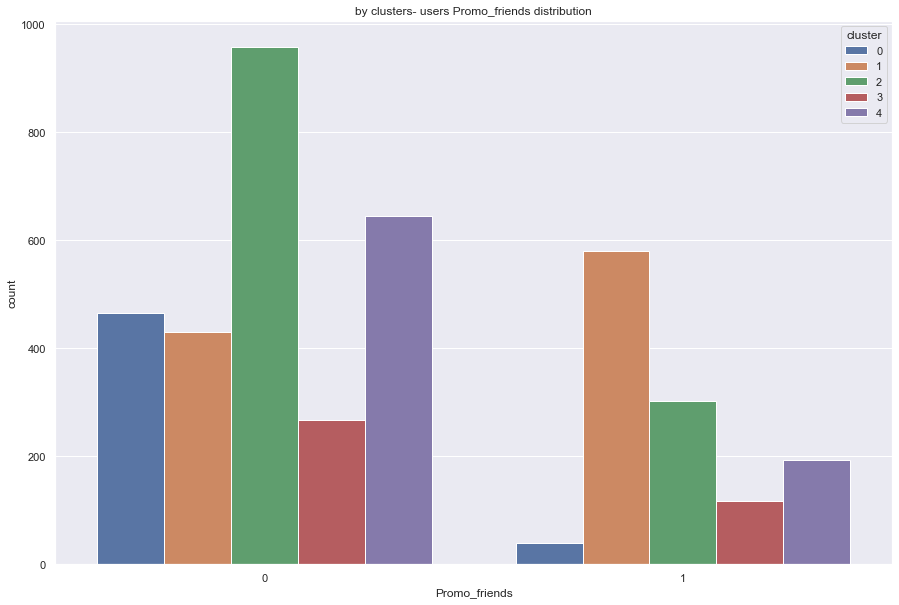

-----Phone-----


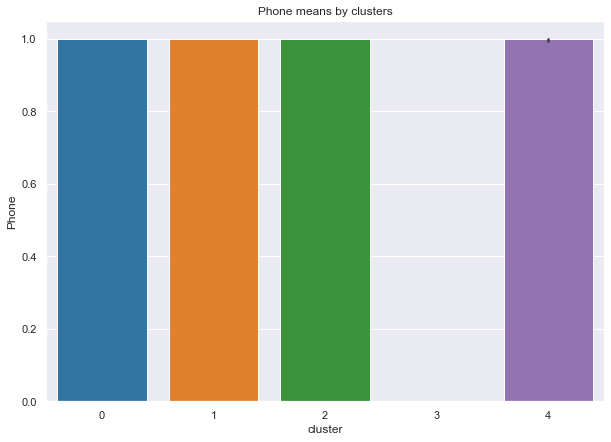

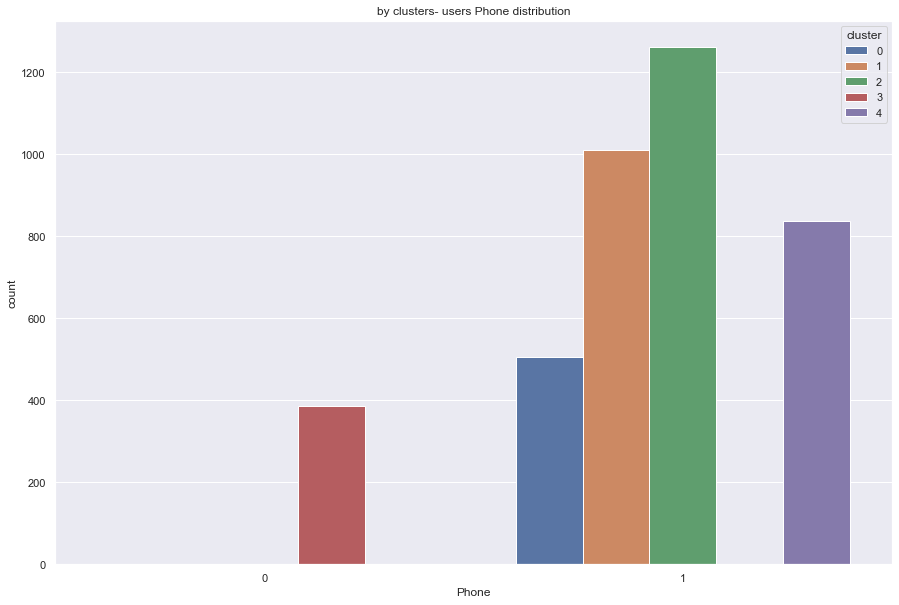

-----Contract_period-----


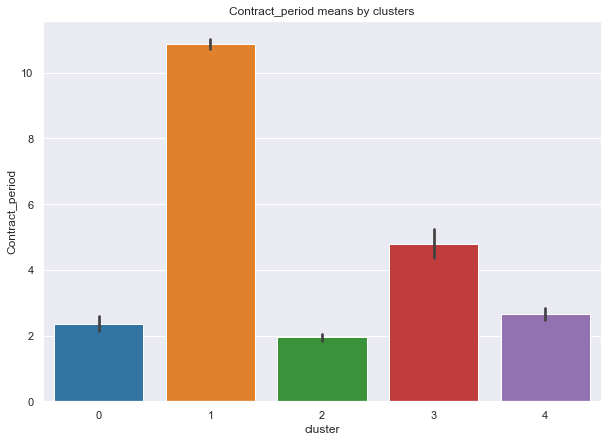

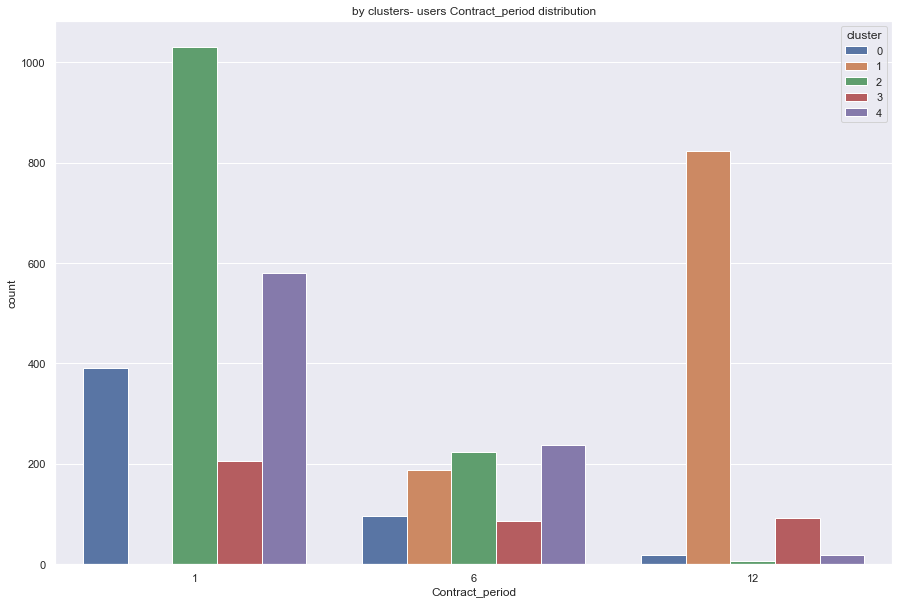

-----Group_visits-----


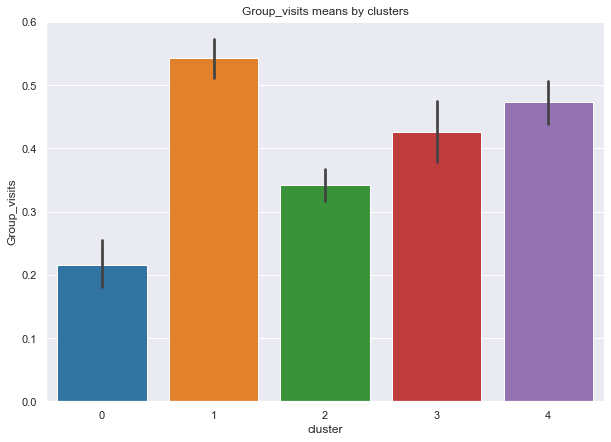

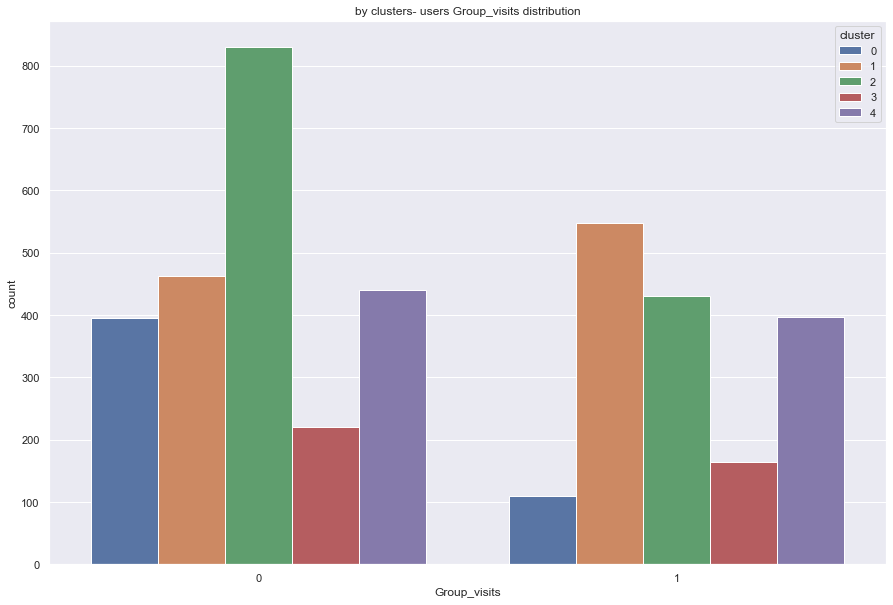

-----Age-----


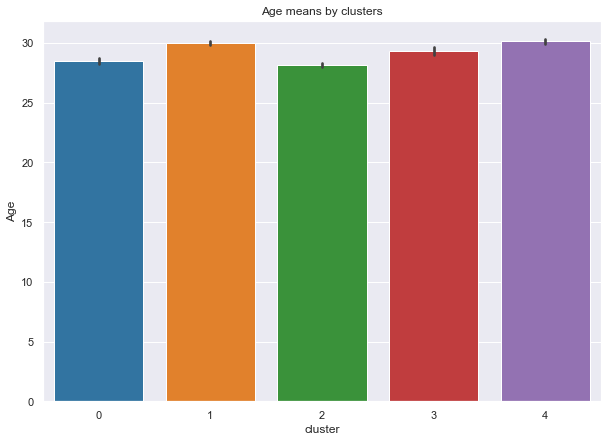

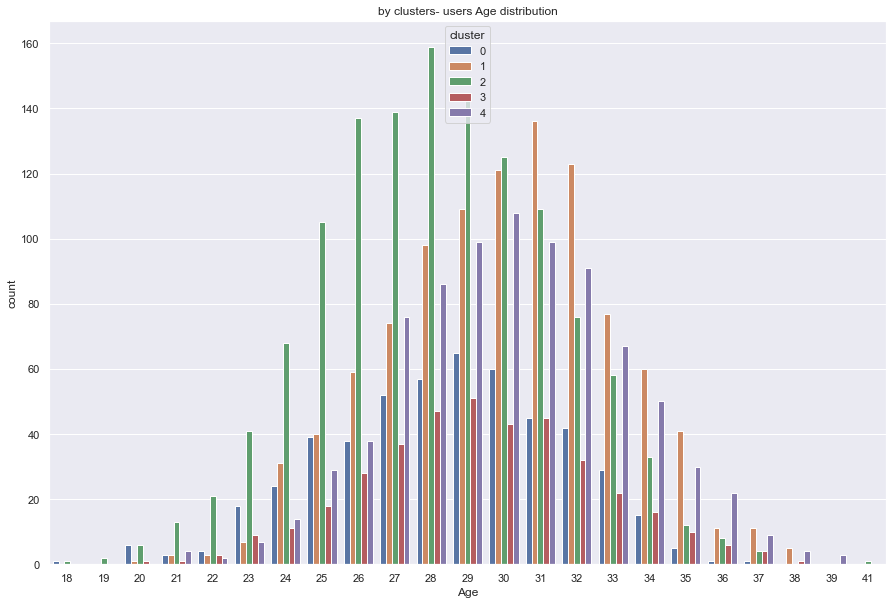

-----Month_to_end_contract-----


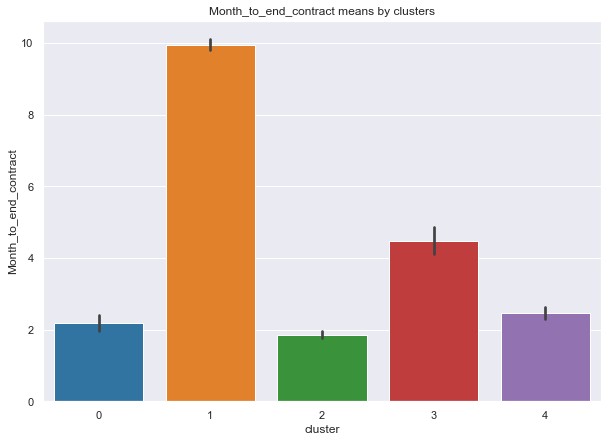

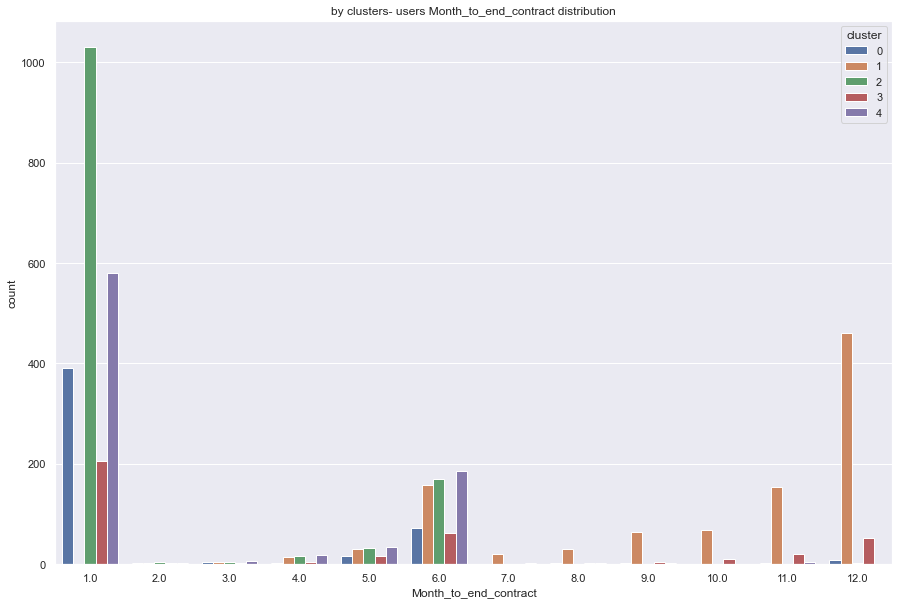

-----Lifetime-----


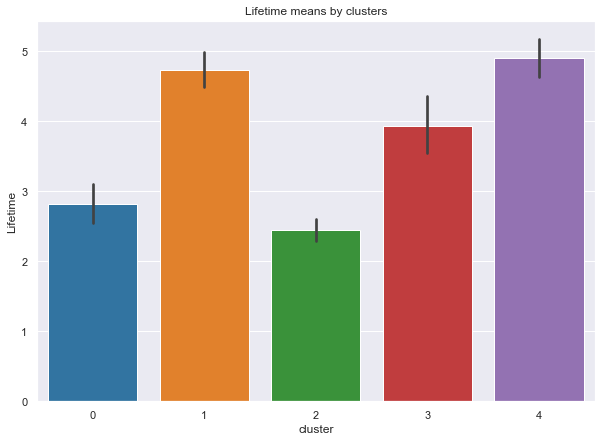

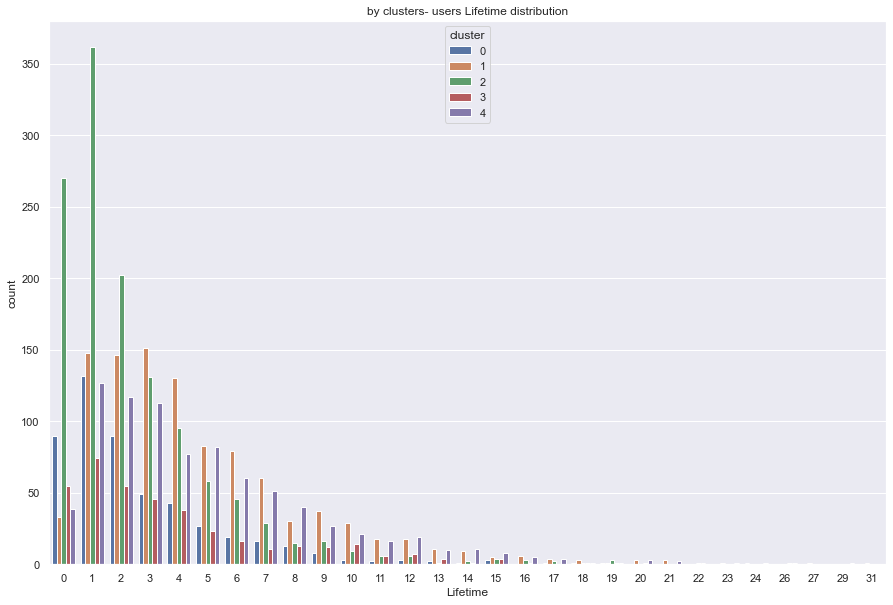

In [24]:
par_l=data.drop(columns=['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn', 'cluster']).columns
for p in par_l:
    print('-----{}-----'.format(p))
    
    sns.set(rc = {'figure.figsize':(10,7)})
    sns.barplot(data=data, x='cluster', y=p, palette="tab10").set(title='{} means by clusters'.format(p))
    plt.show()
    
    sns.set(rc = {'figure.figsize':(15,10)})
    ax=sns.countplot(data=data, x=p, hue='cluster').set(title='by clusters- users {} distribution'.format(p))
    plt.show()

## Clusters- conclusion and recommendations
- cluster 2- the churn risk (56% churn rate) has the lowest means at all features accept gender (this feature seems not relevant), partner (cluster 2 and 3 at the bottom together) and phone (all users gave phones except cluster 0).
- cluster 1- most loyal (2% churn rate). Most of the cluster has a partner discount (74%). They buy almost exclusively the full year contract. They lead on group visits and has a long lifetime.
- cluster 3- loyal (8% churn rate). Attending the most at classes. Slightly more mans then females (maybe man workout more). Most of them don’t have the partner discount (28%). Didn’t arrive via promo friends (7%). A bit older than the other clusters. For some reason they buying the short contracts (the only reason I can think of is the lack of discount on the longer ones). They have the longest lifetime. They seem like the biting heart of the gym- people that really want to workout.
- Cluster 0- medium (26% churn rate)- nothing pops out. Seems average or evenly distributed at all features. (Almost to neatly average- like a computer generate).
- Cluster 5- medium (26% churn rate)- all came via promo friends. most of them has a partner discount (81%). They only have the 1- and 3-months contract (not the full year). It seems that the difference between them and cluster 1 (the most loyal) is the period of contract. 

**General principles:**
- trying to give incentives to buy the long contracts. Even at the cost of losing current revenues. The gym needs to 'hook' the users and putting a lot of effort and resources at the beginning. Later on, the user is an 'addict' (in a good way) and will continue with the gym.
- trying to give users a community vibe. Mabey parties or contests. The belonging feeling makes users more loyal.

**strategy by cluster:**
- Cluster 2- the churn rate is terrible. We can push aggressively (hard to believe we will make the rate worst). A lot of interaction. Gifts. Reminders. The all-retention arsenal. 
- cluster 1- thread verry verry lightly. Its an amazing churn rate- we don’t want to make things worse, and were not sure we can make them better (people change locations sometimes or get injured). Some surveys- to learn what works good for the cluster and maybe to amply on other clusters (except the fact their enjoying the partner discount). 
- cluster 3- they are the beating heart of the gym. This cluster have a huge impact on recruiting other users. Finding out why they buy the monthly contract (it has to change- we want their long commitment). They love the gym- we should try to incentive them to bring more users.
- Cluster 0- nothing special (same as 2 pretty much).
- Cluster 5- they have the potential to be cluster 1 users. We need them to buy the long contracts. More effort at the sale peach when new 'partner user' arrives at the first time. I would recommend a promotion that let them to add money to their existing contract and upgrade it the long one (without having to renew from 0).

